In [1]:
#Importing modules
import pandas as pd
import numpy as np
import sklearn
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#Ignoring Warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
merged_data = pd.read_csv('./clean_data_after_eda.csv')
price_df = pd.read_csv('price_data.csv')


In [3]:
merged_data

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,...,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,...,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1
14602,14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1
14603,14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0


---

# Feature engineering

### 1. Difference between off-peak prices in December and preceding January

This first feature is called Difference between off-peak prices in December and preceding January.I will build on this to create more features with predictive power.

In [4]:
#Converting reference date("Price_date") to datetime with pandas
price_df["price_date"] = pd.to_datetime(price_df["price_date"],format="%Y-%m-%d")

In [5]:
#Findng the average prices for the off peak prices
monthly_price_by_date = price_df.groupby(["id","price_date"]).agg({"price_off_peak_var": "mean", "price_off_peak_fix": "mean"}).reset_index()
monthly_price_by_date

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885


In [6]:
jan_prices = monthly_price_by_date.groupby("id").first().reset_index()
dec_prices = monthly_price_by_date.groupby("id").last().reset_index()

#Difference between off peak prices for energy
offpeak_diff_var = dec_prices["price_off_peak_var"] - jan_prices["price_off_peak_var"]
#Difference between off peak prices for gas
offpeak_diff_fix = dec_prices["price_off_peak_fix"] - jan_prices["price_off_peak_fix"]

diff = pd.concat([offpeak_diff_var,offpeak_diff_fix],axis =1)
diff = diff.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'})
df = pd.concat([merged_data,diff],axis =1)
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,dec_1,dec_2
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1.0,-0.006192,0.162916
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0.0,-0.004104,0.177779
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0.0,0.050443,1.500000
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0.0,-0.010018,0.162916
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0.0,-0.003994,-0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050232,-0.335085
16092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003778,0.177779
16093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001760,0.164916
16094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009391,0.162916


---
## 2. Average Price Changes Across Periods
This second feature is the average price changes across the three periods

In [7]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,dec_1,dec_2
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1.0,-0.006192,0.162916
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0.0,-0.004104,0.177779
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0.0,0.050443,1.500000
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0.0,-0.010018,0.162916
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0.0,-0.003994,-0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050232,-0.335085
16092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003778,0.177779
16093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001760,0.164916
16094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009391,0.162916


In [8]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p3,churn,dec_1,dec_2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,8.182687,1.0,-0.006192,0.162916,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0.0,-0.004104,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,0.0,0.050443,1.500000,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0.0,-0.010018,0.162916,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,16.365274,0.0,-0.003994,-0.000001,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


## 3. Maximum Price Changes Across Periods
This third feature is the maximum price changes across the three periods

In [10]:
max_diff_across_periods_months = df.groupby("id").agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)
df = pd.merge(df,max_diff_across_periods_months,on="id")
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.058257,18.590255,7.450670,26.040925,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.149609,44.311375,0.000000,44.311375,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.170512,44.385450,0.000000,44.385450,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.151210,44.400265,0.000000,44.400265,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.051309,16.275263,8.137629,24.412893,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600.0,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270.0,47940.0,0.0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,...,0.144124,44.370635,0.000000,44.370635,0.144124,0.000000,0.144124,44.370635,0.000000,44.370635
14601,14601.0,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223.0,0.0,181.0,2012-08-27,2016-08-27,2012-08-27,2015-08-28,...,0.035982,22.622294,28.047961,50.670256,0.011393,0.024589,0.035982,22.622294,28.047961,50.670256
14602,14602.0,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844.0,0.0,179.0,2012-02-08,2016-02-07,2012-02-08,2015-02-09,...,0.051178,16.280694,8.140345,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
14603,14603.0,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131.0,0.0,0.0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,...,0.149609,44.311375,0.000000,44.311375,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375


## 4. TENURE
How the duration of a client being a customer affects their tendency to churn

In [11]:
#Converting dates in the table to datetime
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')

In [12]:
#Finding the duration of being a customer and converting it to years
df["Tenure"] = ((df["date_end"] - df["date_activ"])/np.timedelta64(1, 'Y')).astype(int)
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,Tenure
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,18.590255,7.450670,26.040925,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,44.311375,0.000000,44.311375,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,44.385450,0.000000,44.385450,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,44.400265,0.000000,44.400265,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,16.275263,8.137629,24.412893,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600.0,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270.0,47940.0,0.0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,...,44.370635,0.000000,44.370635,0.144124,0.000000,0.144124,44.370635,0.000000,44.370635,3
14601,14601.0,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223.0,0.0,181.0,2012-08-27,2016-08-27,2012-08-27,2015-08-28,...,22.622294,28.047961,50.670256,0.011393,0.024589,0.035982,22.622294,28.047961,50.670256,4
14602,14602.0,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844.0,0.0,179.0,2012-02-08,2016-02-07,2012-02-08,2015-02-09,...,16.280694,8.140345,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038,3
14603,14603.0,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131.0,0.0,0.0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,...,44.311375,0.000000,44.311375,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,4


In [13]:
#Correlating their years to tendency to churn
df.groupby("Tenure").agg({'churn': "mean"}).sort_values(by = "churn", ascending=False)

,churn
Tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


This clearly shows that 4 months and less customers are more likely to churn
Tenure interesting feature to keep for modelling because clearly how long you’ve been a client, has a influence on the chance of a client churning.

In [14]:
reference_date = datetime(2016, 1, 1)
df["month_active"] = ((reference_date - df["date_activ"])/np.timedelta64(1,"M")).astype(int)
df["month_to_end"] = ((reference_date - df["date_end"])/np.timedelta64(1,"M")).astype(int)
df["month_modif_prod"] = ((reference_date - df["date_modif_prod"])/np.timedelta64(1,"M")).astype(int)
df["month_renewal"] = ((reference_date - df["date_renewal"])/np.timedelta64(1,"M")).astype(int)
df


,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,Tenure,month_active,month_to_end,month_modif_prod,month_renewal
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,-5,2,6
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,-7,76,4
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,-3,68,8
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,-2,69,9
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,-2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600.0,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270.0,47940.0,0.0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,...,0.000000,0.144124,44.370635,0.000000,44.370635,3,43,-4,7,19
14601,14601.0,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223.0,0.0,181.0,2012-08-27,2016-08-27,2012-08-27,2015-08-28,...,0.024589,0.035982,22.622294,28.047961,50.670256,4,40,-7,40,4
14602,14602.0,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844.0,0.0,179.0,2012-02-08,2016-02-07,2012-02-08,2015-02-09,...,0.030633,0.051178,16.280694,8.140345,24.421038,3,46,-1,46,10
14603,14603.0,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131.0,0.0,0.0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,...,0.007124,0.149609,44.311375,0.000000,44.311375,4,40,-7,40,4


In [15]:
remove = ["date_activ",
          "date_end",
          "date_modif_prod",
          "date_renewal"

]
df = df.drop(columns = remove)
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,Tenure,month_active,month_to_end,month_modif_prod,month_renewal
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,0.00,0.0,0.0,1.78,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,-5,2,6
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,-7,76,4
2,2.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,47.96,0.0,0.0,38.72,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,-3,68,8
3,3.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,-2,69,9
4,4.0,149d57cf92fc41cf94415803a877cb4b,MISSING,4425.0,0.0,526.0,445.75,526.0,0.0,131.73,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,-2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600.0,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270.0,47940.0,0.0,4648.01,0.0,0.0,18.57,...,0.000000,0.144124,44.370635,0.000000,44.370635,3,43,-4,7,19
14601,14601.0,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223.0,0.0,181.0,631.69,181.0,0.0,144.03,...,0.024589,0.035982,22.622294,28.047961,50.670256,4,40,-7,40,4
14602,14602.0,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844.0,0.0,179.0,190.39,179.0,0.0,129.60,...,0.030633,0.051178,16.280694,8.140345,24.421038,3,46,-1,46,10
14603,14603.0,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131.0,0.0,0.0,19.34,0.0,0.0,7.18,...,0.007124,0.149609,44.311375,0.000000,44.311375,4,40,-7,40,4


## Transforming Boolean data
#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [16]:
df.has_gas = df.has_gas.replace(["f","t"],[0,1])
df.has_gas

0        1
1        0
2        0
3        0
4        0
        ..
14600    1
14601    0
14602    0
14603    0
14604    0
Name: has_gas, Length: 14605, dtype: int64

Finding out how having gas affects a customer's tendency to churn



In [17]:
df.groupby(["has_gas"]).agg({"churn":"mean"})

,churn
has_gas,
0,0.100544
1,0.081887


It is obvious that a customer having or not having gas affects their tendency to churn.

### Transforming categorical data

A predictive model cannot accept categorical or `string` values.

The simplest method is to map each category to an integer (label encoding/Ordinal encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [18]:


# Transform into categorical type
df.channel_sales = df.channel_sales.astype("category")
# Let's see how many values every unique column holds
df.channel_sales.value_counts()



foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [19]:

df = pd.get_dummies(df,columns=["channel_sales"],prefix="channel")
df

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,month_modif_prod,month_renewal,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,0.00,0.0,0.0,1.78,0.114481,...,2,6,0,0,0,0,1,0,0,0
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,0.145711,...,76,4,1,0,0,0,0,0,0,0
2,2.0,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,47.96,0.0,0.0,38.72,0.165794,...,68,8,0,0,0,0,1,0,0,0
3,3.0,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,0.146694,...,69,9,0,0,0,0,0,1,0,0
4,4.0,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,445.75,526.0,0.0,131.73,0.116900,...,71,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600.0,18463073fb097fc0ac5d3e040f356987,32270.0,47940.0,0.0,4648.01,0.0,0.0,18.57,0.138305,...,7,19,0,0,0,0,1,0,0,0
14601,14601.0,d0a6f71671571ed83b2645d23af6de00,7223.0,0.0,181.0,631.69,181.0,0.0,144.03,0.100167,...,40,4,0,0,0,0,1,0,0,0
14602,14602.0,10e6828ddd62cbcf687cb74928c4c2d2,1844.0,0.0,179.0,190.39,179.0,0.0,129.60,0.116900,...,46,10,0,0,0,0,1,0,0,0
14603,14603.0,1cf20fd6206d7678d5bcafd28c53b4db,131.0,0.0,0.0,19.34,0.0,0.0,7.18,0.145711,...,40,4,0,0,0,0,1,0,0,0


In [20]:
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                    'channel_epumfxlbckeskwekxbiuasklxalciiuu',
                    'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,Tenure,month_active,month_to_end,month_modif_prod,month_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,0.00,0.0,0.0,1.78,0.114481,...,3,30,-5,2,6,0,0,1,0,0
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,0.145711,...,7,76,-7,76,4,1,0,0,0,0
2,2.0,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,47.96,0.0,0.0,38.72,0.165794,...,6,68,-3,68,8,0,0,1,0,0
3,3.0,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,0.146694,...,6,69,-2,69,9,0,0,0,1,0
4,4.0,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,445.75,526.0,0.0,131.73,0.116900,...,6,71,-2,71,9,1,0,0,0,0


In [21]:


# Transform origin up into categorical type
df.origin_up = df.origin_up.astype("category")
# Let's see how many values every unique column holds
df.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [22]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,month_modif_prod,month_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,0.00,0.0,0.0,1.78,0.114481,...,2,6,0,0,1,0,0,0,0,1
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,0.145711,...,76,4,1,0,0,0,0,1,0,0
2,2.0,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,47.96,0.0,0.0,38.72,0.165794,...,68,8,0,0,1,0,0,1,0,0
3,3.0,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,0.146694,...,69,9,0,0,0,1,0,1,0,0
4,4.0,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,445.75,526.0,0.0,131.73,0.116900,...,71,9,1,0,0,0,0,1,0,0


### Transforming numerical data

In EDA some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [23]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak',
    'margin_gross_pow_ele',
    'margin_net_pow_ele',
    'net_margin'
]
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,margin_gross_pow_ele,margin_net_pow_ele,net_margin
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085,24.564667,24.562063,189.263798
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140,20.231790,20.230898,311.808793
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,14.280000,14.280000,50.710000
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378,21.640000,21.640000,112.500000
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378,29.880000,29.880000,243.130000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,374.640000,374.640000,24570.650000


The STD for most of the features are high

In [24]:
df["cons_12m"] = np.log10(df["cons_12m"]+ 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"]+ 1)
df["cons_last_month"] = np.log10(df["cons_last_month"]+ 1)
df["forecast_cons_12m"]  = np.log10(df["forecast_cons_12m"]+ 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"]+ 1)
df["forecast_discount_energy"] = np.log10(df["forecast_discount_energy"]+ 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"]+ 1)
df["forecast_price_energy_off_peak"] = np.log10(df["forecast_price_energy_off_peak"]+ 1)
df["forecast_price_energy_peak"] = np.log10(df["forecast_price_energy_peak"]+ 1)
df["forecast_price_pow_off_peak"] = np.log10(df["forecast_price_pow_off_peak"]+ 1)
df["margin_gross_pow_ele"] = np.log10(df["margin_gross_pow_ele"]+ 1)
df["margin_net_pow_ele"] = np.log10(df["margin_net_pow_ele"]+ 1)
df["net_margin"] = np.log10(df["net_margin"]+ 1)

df[skewed].describe()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,margin_gross_pow_ele,margin_net_pow_ele,net_margin
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.050868,1.517233,0.055766,0.020917,1.636057,1.300002,1.299958,2.009987
std,0.884545,1.716828,1.769266,0.683612,1.584972,0.267329,0.571489,0.009438,0.020297,0.134242,0.340546,0.340539,0.551848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163,1.184123,1.184123,1.713575
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.058109,0.035085,1.656207,1.354876,1.354876,2.054996
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.059316,0.040933,1.656207,1.489677,1.489677,2.387621
max,6.792889,6.618528,5.887169,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075,2.574772,2.574772,4.390434


Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.
Let’s quickly check the distributions of some of these features too.

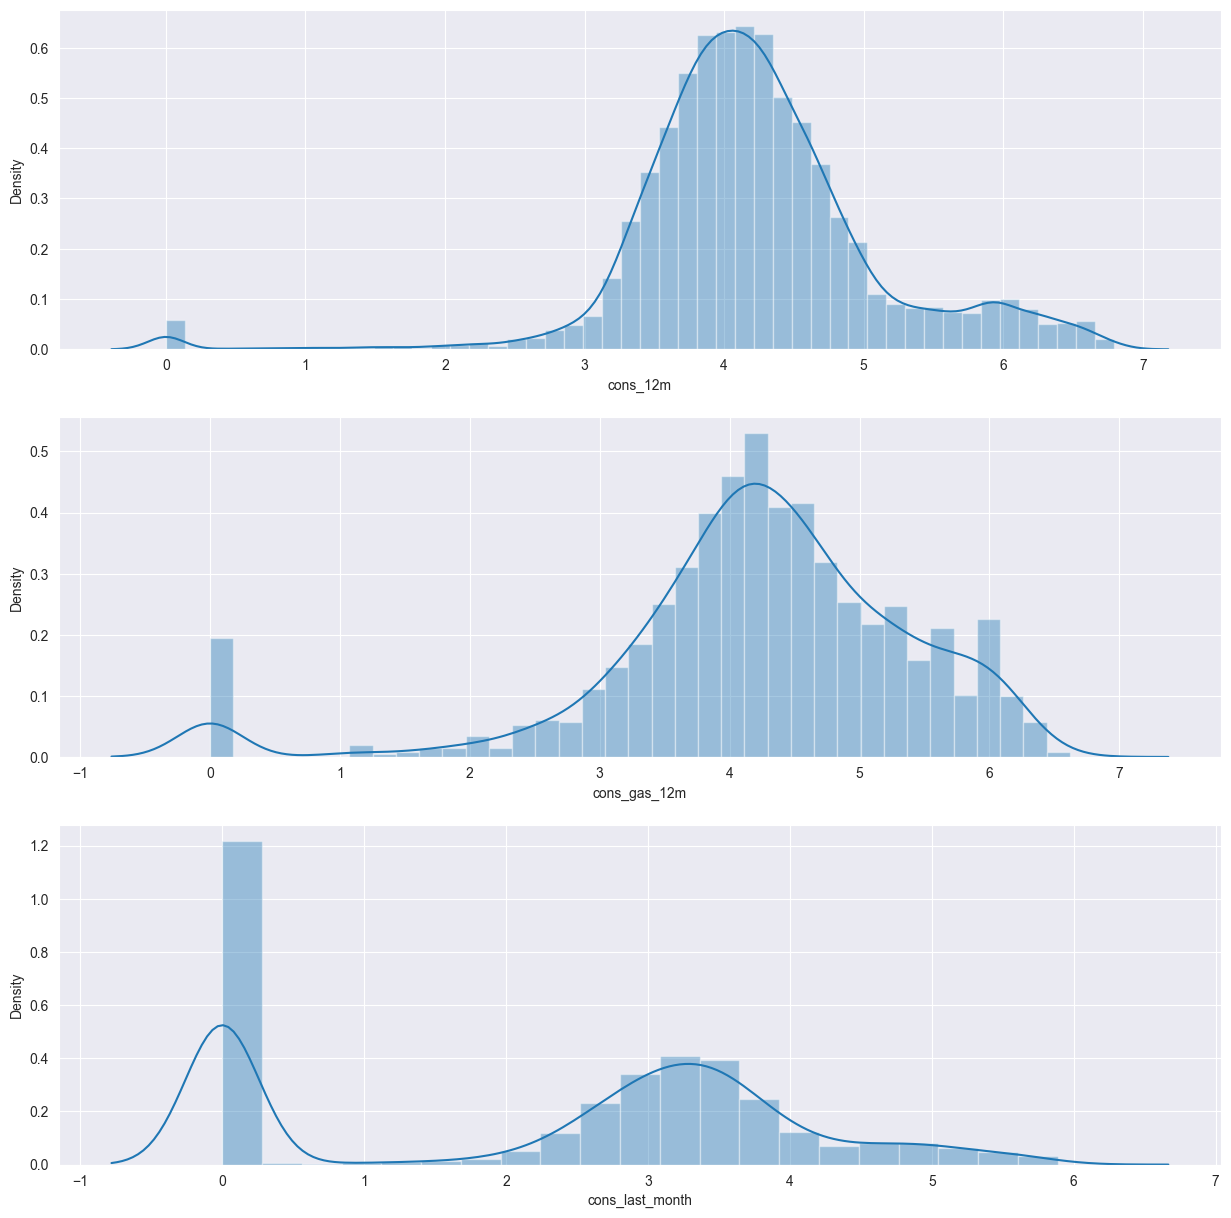

In [25]:
fig, axs = plt.subplots(nrows=3,figsize=(15,15))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()


In [26]:
# corr = df.corr()
# plt.figure(figsize =(45,45))
# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()


In [27]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,month_modif_prod,month_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,2,6,0,0,1,0,0,0,0,1
1,1.0,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2.0,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,...,68,8,0,0,1,0,0,1,0,0
3,3.0,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4.0,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,...,71,9,1,0,0,0,0,1,0,0


---

## 5. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.
A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [29]:
#Divide dataset into feature and Target
target = df["churn"]
feature = df.drop(columns=["id","churn"])

In [30]:
print(target.shape)
print(feature.shape)

(14605,)
(14605, 71)


In [31]:
target.shape

(14605,)

In [32]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=42)
print(feature_train.shape)
print(target_train.shape)
print(feature_test.shape)
print(target_test.shape)

(10953, 71)
(10953,)
(3652, 71)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of the ensemble

In [33]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(feature_train,target_train)

RandomForestClassifier(n_estimators=1000)

# Evaluation
Now let’s evaluate how well this trained model is able to predict the values of the test dataset.
We are going to use 3 metrics to evaluate performance:
- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [34]:
prediction = model.predict(feature_test)
tn,fp,fn,tp = metrics.confusion_matrix(target_test,prediction).ravel()

In [35]:
print(f"True Negative: {tn}")
print(f"True Positive: {tp}")
print(f"False Negative: {fn}")
print(f"False Positive: {fp}\n")

True Negative: 3278
True Positive: 12
False Negative: 361
False Positive: 1



In [36]:
print(f"Precision: {metrics.precision_score(target_test,prediction)*100}%")
print(f"Accuracy: {metrics.accuracy_score(target_test,prediction)*100}%")
print(f"Recall: {metrics.recall_score(target_test,prediction)*100}%")

Precision: 92.3076923076923%
Accuracy: 90.08762322015335%
Recall: 3.2171581769436997%


- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 2647 out of 2920. This means that out of all the negative cases (churn = 0), we predicted 2647 as negative.

- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 257, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
-
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 1 case
-
- With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 15 of those 366, which is very poor.
-
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners.

 For now, lets dive into understanding the model a little more.


### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [37]:
feature_importances = pd.DataFrame({"feature":feature_train.columns,
                                    "importance":model.feature_importances_


}).sort_values(by = "importance",ascending=True).reset_index()
feature_importances

,index,feature,importance
0,5,forecast_discount_energy,0.000693
1,39,mean_3m_price_p2_fix,0.000999
2,40,mean_3m_price_p3_fix,0.001050
3,31,mean_6m_price_p3_fix,0.001806
4,30,mean_6m_price_p2_fix,0.001817
...,...,...,...
66,15,net_margin,0.040937
67,12,margin_gross_pow_ele,0.040940
68,6,forecast_meter_rent_12m,0.041044
69,1,cons_12m,0.043277


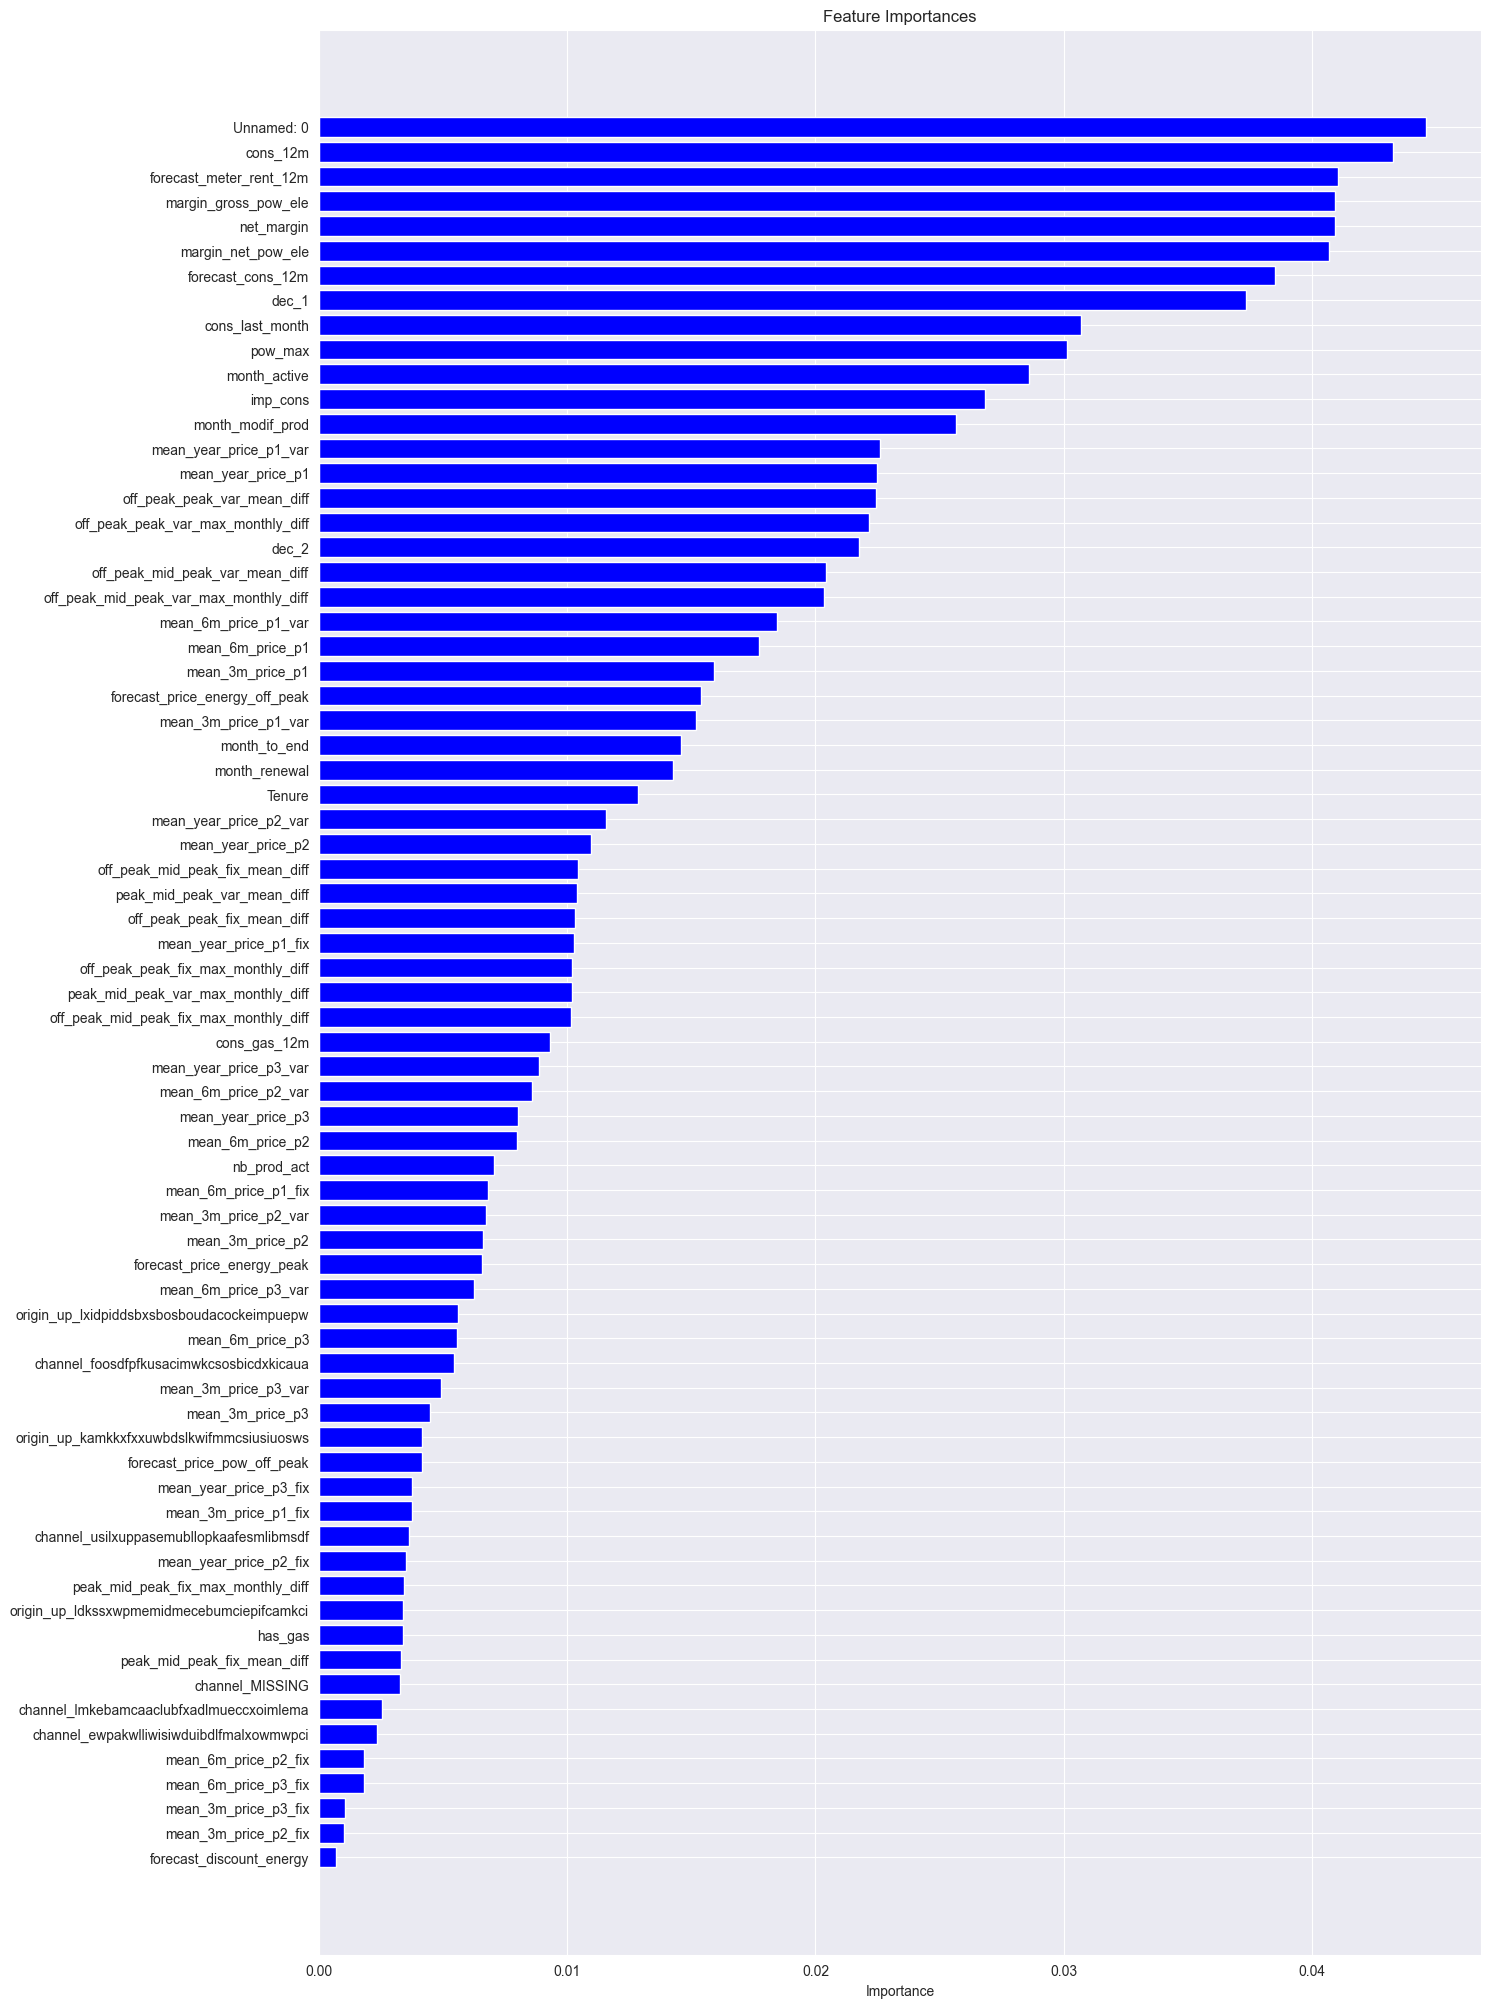

In [38]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.